In [21]:
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [22]:
import requests
import pandas as pd

In [23]:
mysql_versions = {
    1: "MySQL 4.0",
    2: "MySQL 4.1",
    3: "MySQL 5.0",
    4: "MySQL 5.1",
    5: "MySQL 5.5",
    6: "MySQL 5.6",
    7: "MySQL 5.7",
}
ga_dates = [
    '2003-03-15', # 4.0 
    '2004-10-23', # 4.1 
    '2005-10-19', # 5.0 
    '2008-11-14', # 5.1 
    '2010-12-03', # 5.5
    '2013-02-05', # 5.6
    '2015-10-21', # 5.7
]

In [24]:
tide_url_pattern = 'https://bugs.mysql.com/tide.php?ver=%s'

In [25]:
def get_df_for_id(version_id):
    tide_req = requests.get(tide_url_pattern % version_id)
    tide_data = pd.read_html(tide_req.text, header=0, index_col=0)[0].drop('Total')
    return tide_data

In [26]:
dfs = []
for version_id in mysql_versions:
    print('Fetching data for Version ID: %s' % version_id)
    df = get_df_for_id(version_id)
    dfs.append(df)

Fetching data for Version ID: 1
Fetching data for Version ID: 2
Fetching data for Version ID: 3
Fetching data for Version ID: 4
Fetching data for Version ID: 5
Fetching data for Version ID: 6
Fetching data for Version ID: 7


In [27]:
series = []
for (version_id, df) in enumerate(dfs, start=1):
    series.append(df['Opened'])

In [28]:
all_table = pd.concat(series, axis=1)
all_table.columns = [mysql_versions[x] for x in mysql_versions]
all_table.index = pd.to_datetime(all_table.index)

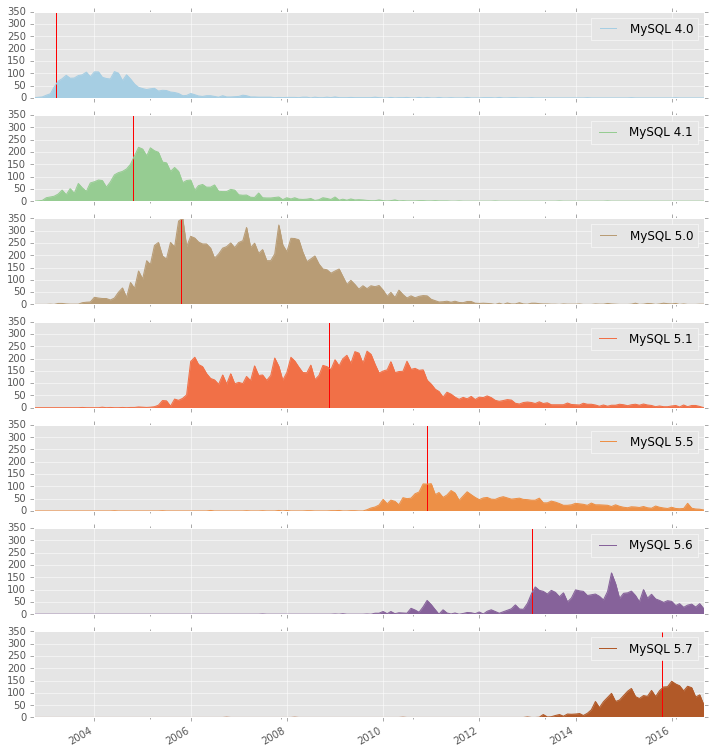

In [29]:
axes = all_table.plot(kind='area', subplots=True, colormap='Paired', figsize=(12,14), sharey=True)
for nr, ax in enumerate(axes):
    ymin, ymax = ax.get_ylim()
    ax.vlines(x=pd.to_datetime(ga_dates[nr]), ymin=ymin, ymax=ymax-1, color='r')

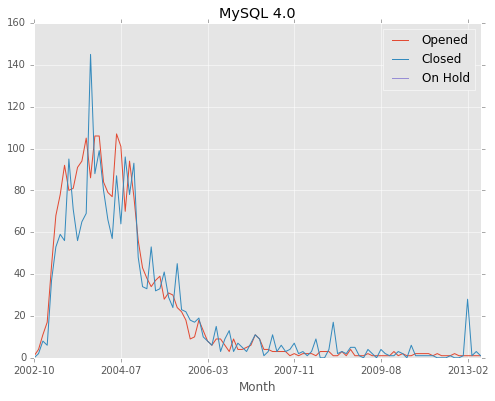

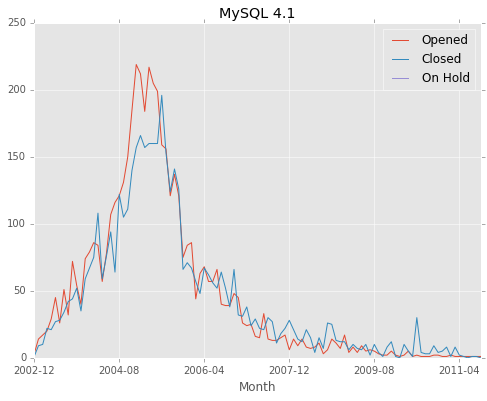

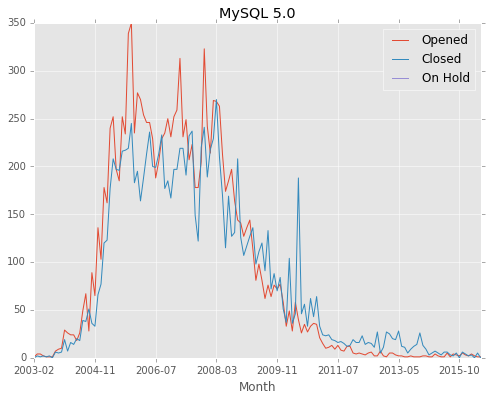

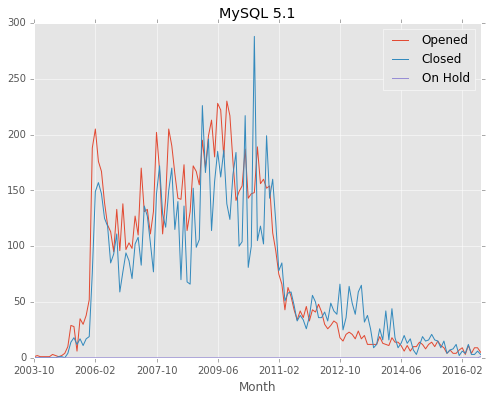

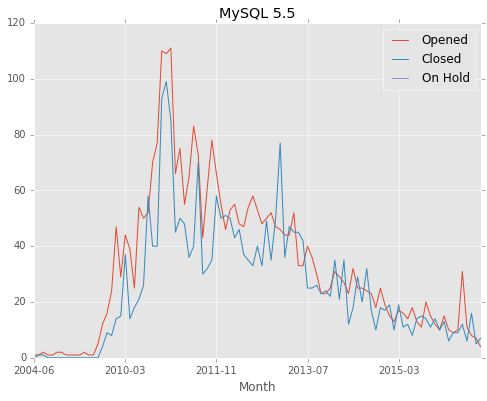

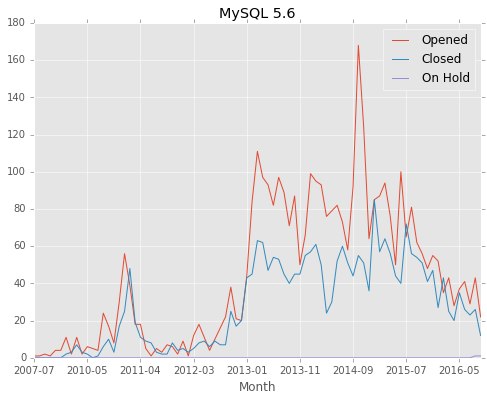

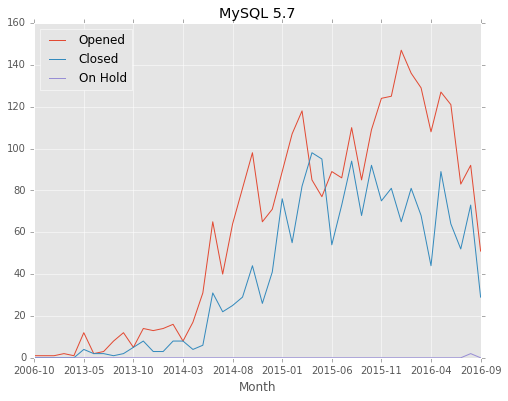

In [30]:
for (version_id, df) in enumerate(dfs, start=1):
    df.plot(title=mysql_versions[version_id], figsize=(8,6))